# Modules & Data Loading

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer,LabelEncoder
from sklearn.metrics import roc_auc_score,accuracy_score,classification_report,roc_curve,confusion_matrix
import sklearn

In [2]:
file_path = 'file/Train.csv'
train_data = pd.read_csv(file_path)
#train_data_str = pd.read_csv(file_path,dtype=str)

In [3]:
len(list(train_data.columns))

40

In [4]:
test_data = pd.read_csv('file/Test.csv')

In [5]:
train_data.columns

Index(['ID', 'account_type', 'gender', 'age', 'region_code', 'dc_cons_apr',
       'dc_cons_may', 'dc_cons_jun', 'cc_count_apr', 'cc_count_may',
       'cc_count_jun', 'dc_count_apr', 'dc_count_may', 'dc_count_jun',
       'card_lim', 'personal_loan_active', 'vehicle_loan_active',
       'personal_loan_closed', 'vehicle_loan_closed', 'investment_1',
       'investment_2', 'investment_3', 'investment_4', 'debit_amount_apr',
       'credit_amount_apr', 'debit_count_apr', 'credit_count_apr',
       'max_credit_amount_apr', 'debit_amount_may', 'credit_amount_may',
       'credit_count_may', 'debit_count_may', 'max_credit_amount_may',
       'debit_amount_jun', 'credit_amount_jun', 'credit_count_jun',
       'debit_count_jun', 'max_credit_amount_jun', 'loan_enq', 'cc_cons'],
      dtype='object')

In [6]:
test_data.columns

Index(['ID', 'account_type', 'gender', 'age', 'region_code', 'dc_cons_apr',
       'dc_cons_may', 'dc_cons_jun', 'cc_count_apr', 'cc_count_may',
       'cc_count_jun', 'dc_count_apr', 'dc_count_may', 'dc_count_jun',
       'card_lim', 'personal_loan_active', 'vehicle_loan_active',
       'personal_loan_closed', 'vehicle_loan_closed', 'investment_1',
       'investment_2', 'investment_3', 'investment_4', 'debit_amount_apr',
       'credit_amount_apr', 'debit_count_apr', 'credit_count_apr',
       'max_credit_amount_apr', 'debit_amount_may', 'credit_amount_may',
       'credit_count_may', 'debit_count_may', 'max_credit_amount_may',
       'debit_amount_jun', 'credit_amount_jun', 'credit_count_jun',
       'debit_count_jun', 'max_credit_amount_jun', 'loan_enq'],
      dtype='object')

In [7]:
train_data.head()

,ID,account_type,gender,age,region_code,dc_cons_apr,dc_cons_may,dc_cons_jun,cc_count_apr,cc_count_may,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,cc_cons
0,12554,saving,F,36,336.0,10740.542453,26271.575951,12332.393444,4.0,6.0,...,2.0,1.0,110403.214364,1.114847e+06,6.868706e+05,2.0,1.0,161824.467583,NaN,1946.0
1,17645,current,M,24,529.0,15400.274698,16346.513708,13308.843760,14.0,10.0,...,2.0,17.0,336653.547124,4.010666e+05,2.368395e+05,10.0,31.0,530033.850635,NaN,66784.0
2,7604,current,M,34,541.0,NaN,16616.791206,8165.060330,19.0,8.0,...,4.0,22.0,359000.879855,8.944534e+05,1.896231e+06,5.0,24.0,481495.648386,Y,14469.0
3,1590,current,M,39,523.0,15962.461007,17848.552395,28502.691521,NaN,1.0,...,6.0,39.0,217724.536892,1.772801e+06,1.276362e+06,7.0,37.0,536714.940949,NaN,6494.0
4,16556,current,M,28,239.0,NaN,35661.995527,13474.223363,23.0,14.0,...,4.0,15.0,519029.306872,8.525740e+05,6.110580e+05,3.0,26.0,349316.588945,NaN,14588.0


# EDA & Features

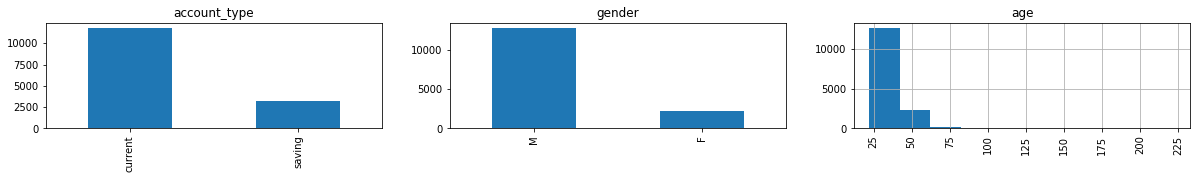

In [8]:
fig = plt.figure(figsize=(35, 25))
cols = 5
rows = np.ceil(float(train_data.shape[1]) / cols)
for i, column in enumerate(train_data.columns):
    if column in ('gender','age','account_type'):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if  train_data.dtypes[column] == np.object:
            train_data[column].value_counts().plot(kind="bar", axes=ax)
        else:
            train_data[column].hist(axes=ax)
            plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2)

In [9]:
train_col_list = train_data.dtypes
train_data[train_data.columns[1:]].corr()['cc_cons'][:]

age                      0.019747
region_code             -0.002154
dc_cons_apr             -0.005581
dc_cons_may             -0.018028
dc_cons_jun             -0.005228
cc_count_apr             0.089222
cc_count_may             0.097509
cc_count_jun             0.048667
dc_count_apr             0.006567
dc_count_may             0.002527
dc_count_jun            -0.012198
card_lim                 0.018369
personal_loan_active          NaN
vehicle_loan_active           NaN
personal_loan_closed          NaN
vehicle_loan_closed           NaN
investment_1            -0.003954
investment_2             0.082969
investment_3             0.022568
investment_4            -0.015212
debit_amount_apr         0.021145
credit_amount_apr       -0.000695
debit_count_apr         -0.003940
credit_count_apr         0.000264
max_credit_amount_apr    0.013300
debit_amount_may         0.008779
credit_amount_may        0.001150
credit_count_may        -0.005938
debit_count_may         -0.009342
max_credit_amo

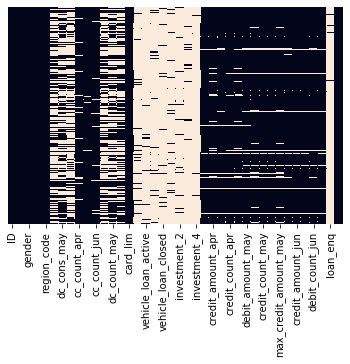

In [10]:
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False)

In [11]:
filna_values = {'dc_cons_apr':0
                ,'dc_cons_may':0
                ,'dc_cons_jun':0
                ,'cc_count_apr':0
                ,'cc_count_may':0
                ,'cc_count_jun':0
                ,'dc_count_apr':0
                ,'dc_count_may':0
                ,'dc_count_jun':0
                ,'cc_count_apr':0
                ,'cc_count_may':0
                ,'credit_count_may':0
                ,'debit_count_may':0
                ,'max_credit_amount_may':0
                ,'debit_amount_jun':0
                ,'credit_amount_jun':0
                ,'credit_count_jun':0
                ,'debit_count_jun':0
                ,'max_credit_amount_jun':0
                ,'debit_amount_apr':0
                ,'debit_count_apr':0
                ,'credit_count_apr':0
                ,'debit_amount_may ':0
                ,'credit_amount_may':0
                ,'max_credit_amount_apr':0
                ,'credit_amount_apr':0
                ,'debit_amount_may':0
               }

train_data.fillna(value=filna_values,inplace=True)
test_data.fillna(value=filna_values,inplace=True)

### Age Validatation & Converting Age to Ranges

In [12]:
def age_valid(x):
    if x>100:
        x=int(str(x)[1:])
    return x

def age_range(x, base=5):
    if x>10 and x<=20:
        x_range = '11-20'
    elif x>20 and x<=30:
        x_range = '21-30'
    elif x>30 and x<=40:
        x_range = '31-40'
    elif x>40 and x<=50:
        x_range = '41-50'
    elif x>50 and x<=60:
        x_range = '51-60'
    elif x>60 and x<=70:
        x_range = '61-70'
    elif x>70 and x<=80:
        x_range = '71-80'
    elif x>80 and x<=90:
        x_range = '81-90'
    elif x>90 and x<=100:
        x_range = '91-100'
    return x_range
train_data['age'] = train_data['age'].apply(age_valid)
train_data['age_range'] = train_data['age'].apply(age_range)
test_data['age'] = test_data['age'].apply(age_valid)
test_data['age_range'] = test_data['age'].apply(age_range)

In [13]:
#train_data['card_lim'].fillna(np.median(train_data['card_lim']),inplace=True)
#test_data['card_lim'].fillna(np.median(train_data['card_lim']),inplace=True)

In [14]:
#train_data.drop(['investment_4','vehicle_loan_active','investment_3','investment_1','vehicle_loan_closed','investment_2','personal_loan_closed','personal_loan_active','loan_enq','age'], axis=1,inplace=True)

In [15]:
train_data.head()

,ID,account_type,gender,age,region_code,dc_cons_apr,dc_cons_may,dc_cons_jun,cc_count_apr,cc_count_may,...,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,cc_cons,age_range
0,12554,saving,F,36,336.0,10740.542453,26271.575951,12332.393444,4.0,6.0,...,1.0,110403.214364,1.114847e+06,6.868706e+05,2.0,1.0,161824.467583,NaN,1946.0,31-40
1,17645,current,M,24,529.0,15400.274698,16346.513708,13308.843760,14.0,10.0,...,17.0,336653.547124,4.010666e+05,2.368395e+05,10.0,31.0,530033.850635,NaN,66784.0,21-30
2,7604,current,M,34,541.0,0.000000,16616.791206,8165.060330,19.0,8.0,...,22.0,359000.879855,8.944534e+05,1.896231e+06,5.0,24.0,481495.648386,Y,14469.0,31-40
3,1590,current,M,39,523.0,15962.461007,17848.552395,28502.691521,0.0,1.0,...,39.0,217724.536892,1.772801e+06,1.276362e+06,7.0,37.0,536714.940949,NaN,6494.0,31-40
4,16556,current,M,28,239.0,0.000000,35661.995527,13474.223363,23.0,14.0,...,15.0,519029.306872,8.525740e+05,6.110580e+05,3.0,26.0,349316.588945,NaN,14588.0,21-30


In [16]:
test_data.head()

,ID,account_type,gender,age,region_code,dc_cons_apr,dc_cons_may,dc_cons_jun,cc_count_apr,cc_count_may,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,age_range
0,17591,saving,F,30,528.0,0.000000,42771.755048,0.000000,7.0,13.0,...,1.0,7.0,341772.344851,6.636797e+05,7.566017e+03,4.0,13.0,398008.239676,NaN,21-30
1,13541,saving,M,39,762.0,22502.476453,10236.114508,405.292748,4.0,2.0,...,6.0,13.0,173291.914429,1.722120e+06,1.855703e+06,2.0,18.0,299411.136857,NaN,31-40
2,13431,current,M,40,670.0,5641.673462,21121.266438,10685.178733,12.0,9.0,...,4.0,21.0,566091.118578,2.911543e+05,2.689932e+05,10.0,18.0,122919.566871,NaN,31-40
3,8687,current,F,24,548.0,0.000000,6744.070501,0.000000,9.0,2.0,...,7.0,19.0,397413.923723,6.850615e+05,9.234176e+05,9.0,12.0,549513.485678,NaN,21-30
4,14727,current,M,33,515.0,17672.792182,77621.691080,7066.852574,1.0,1.0,...,9.0,38.0,179406.943083,5.525640e+05,6.732497e+05,15.0,34.0,198565.622807,NaN,31-40


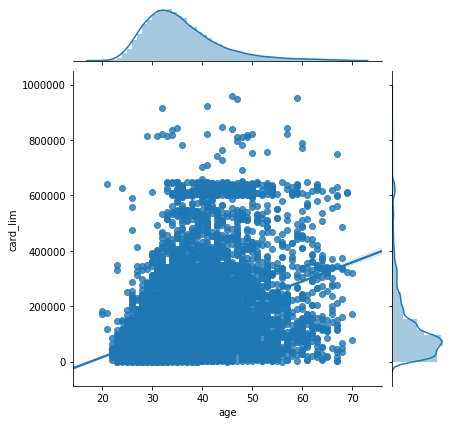

In [17]:
sns.jointplot('age', 'card_lim', data=train_data, kind='reg')

In [18]:
cc_limit_imp = Imputer(missing_values="NaN",strategy='mean',axis=0)
train_data['card_lim_imp'] = cc_limit_imp.fit_transform(train_data[['card_lim']])
test_data['card_lim_imp'] = cc_limit_imp.fit_transform(test_data[['card_lim']])

/home/sourabh/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [19]:
train_data.head()

,ID,account_type,gender,age,region_code,dc_cons_apr,dc_cons_may,dc_cons_jun,cc_count_apr,cc_count_may,...,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,cc_cons,age_range,card_lim_imp
0,12554,saving,F,36,336.0,10740.542453,26271.575951,12332.393444,4.0,6.0,...,110403.214364,1.114847e+06,6.868706e+05,2.0,1.0,161824.467583,NaN,1946.0,31-40,248145.0
1,17645,current,M,24,529.0,15400.274698,16346.513708,13308.843760,14.0,10.0,...,336653.547124,4.010666e+05,2.368395e+05,10.0,31.0,530033.850635,NaN,66784.0,21-30,24005.0
2,7604,current,M,34,541.0,0.000000,16616.791206,8165.060330,19.0,8.0,...,359000.879855,8.944534e+05,1.896231e+06,5.0,24.0,481495.648386,Y,14469.0,31-40,55953.0
3,1590,current,M,39,523.0,15962.461007,17848.552395,28502.691521,0.0,1.0,...,217724.536892,1.772801e+06,1.276362e+06,7.0,37.0,536714.940949,NaN,6494.0,31-40,406984.0
4,16556,current,M,28,239.0,0.000000,35661.995527,13474.223363,23.0,14.0,...,519029.306872,8.525740e+05,6.110580e+05,3.0,26.0,349316.588945,NaN,14588.0,21-30,34545.0


In [20]:
''' missing_card_limit ''' 
#age_wise_card_limit_mean = pd.DataFrame(train_data.groupby(['age','account_type'])['card_lim'].mean()).reset_index()
#age_wise_card_limit_med = pd.DataFrame(train_data.groupby(['age','account_type'])['card_lim'].median()).reset_index()

' missing_card_limit '

In [21]:
#age_wise_card_limit_med
#train_data[X_train['age']==68][['card_lim','account_type']]

### Hot Label Encoding for Object DataType

In [22]:
train_cat = train_data[['account_type','gender','age_range']]
test_cat = test_data[['account_type','gender','age_range']]
train_cat.head()

,account_type,gender,age_range
0,saving,F,31-40
1,current,M,21-30
2,current,M,31-40
3,current,M,31-40
4,current,M,21-30


In [23]:
train_enc = pd.get_dummies(train_cat, columns=['account_type','gender','age_range'])
test_enc = pd.get_dummies(test_cat, columns=['account_type','gender','age_range'])
#X_enc.drop(['loan_enq'], axis=1,inplace=True)
train_enc.head()

,account_type_current,account_type_saving,gender_F,gender_M,age_range_11-20,age_range_21-30,age_range_31-40,age_range_41-50,age_range_51-60,age_range_61-70
0,0,1,1,0,0,0,1,0,0,0
1,1,0,0,1,0,1,0,0,0,0
2,1,0,0,1,0,0,1,0,0,0
3,1,0,0,1,0,0,1,0,0,0
4,1,0,0,1,0,1,0,0,0,0


### Droping Unwanted Columns

In [24]:
train_data.drop(['card_lim','ID','region_code','investment_4','vehicle_loan_active','investment_3','investment_1','vehicle_loan_closed','investment_2','personal_loan_closed','personal_loan_active','loan_enq','age','account_type','gender','age_range'], axis=1,inplace=True)
train_data.drop(['dc_cons_apr','dc_cons_may','dc_cons_jun','dc_count_apr','dc_count_may','dc_count_jun'], axis=1,inplace=True)

In [25]:
test_data.drop(['card_lim','ID','region_code','investment_4','vehicle_loan_active','investment_3','investment_1','vehicle_loan_closed','investment_2','personal_loan_closed','personal_loan_active','loan_enq','age','account_type','gender','age_range'], axis=1,inplace=True)
test_data.drop(['dc_cons_apr','dc_cons_may','dc_cons_jun','dc_count_apr','dc_count_may','dc_count_jun'], axis=1,inplace=True)

In [26]:
train_data.shape

(15000, 20)

In [27]:
test_data.shape

(5000, 19)

### Concat Hot Labeled data with train dataset

In [28]:
train_data = pd.concat([train_data,train_enc], axis=1)
test_data = pd.concat([test_data,test_enc], axis=1)

In [29]:
train_data.isnull().sum()

cc_count_apr             0
cc_count_may             0
cc_count_jun             0
debit_amount_apr         0
credit_amount_apr        0
debit_count_apr          0
credit_count_apr         0
max_credit_amount_apr    0
debit_amount_may         0
credit_amount_may        0
credit_count_may         0
debit_count_may          0
max_credit_amount_may    0
debit_amount_jun         0
credit_amount_jun        0
credit_count_jun         0
debit_count_jun          0
max_credit_amount_jun    0
cc_cons                  0
card_lim_imp             0
account_type_current     0
account_type_saving      0
gender_F                 0
gender_M                 0
age_range_11-20          0
age_range_21-30          0
age_range_31-40          0
age_range_41-50          0
age_range_51-60          0
age_range_61-70          0
dtype: int64

In [30]:
test_data.isnull().sum()

cc_count_apr             0
cc_count_may             0
cc_count_jun             0
debit_amount_apr         0
credit_amount_apr        0
debit_count_apr          0
credit_count_apr         0
max_credit_amount_apr    0
debit_amount_may         0
credit_amount_may        0
credit_count_may         0
debit_count_may          0
max_credit_amount_may    0
debit_amount_jun         0
credit_amount_jun        0
credit_count_jun         0
debit_count_jun          0
max_credit_amount_jun    0
card_lim_imp             0
account_type_current     0
account_type_saving      0
gender_F                 0
gender_M                 0
age_range_11-20          0
age_range_21-30          0
age_range_31-40          0
age_range_41-50          0
age_range_51-60          0
age_range_61-70          0
dtype: int64

# Split Data into Train & Test(val) sets

In [31]:
X = train_data.iloc[:,:-1]
#X = train_data.iloc[:,:]
y = train_data['cc_cons']
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size =0.3 , random_state = 42)

# Model 1 : linearReg

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_val)    

In [33]:
from sklearn.metrics import mean_squared_log_error
np.sqrt(mean_squared_log_error( y_val, y_pred ))

1.7275455415251165e-13

# Model 2 linearReg with PCA

In [34]:
X.columns

Index(['cc_count_apr', 'cc_count_may', 'cc_count_jun', 'debit_amount_apr',
       'credit_amount_apr', 'debit_count_apr', 'credit_count_apr',
       'max_credit_amount_apr', 'debit_amount_may', 'credit_amount_may',
       'credit_count_may', 'debit_count_may', 'max_credit_amount_may',
       'debit_amount_jun', 'credit_amount_jun', 'credit_count_jun',
       'debit_count_jun', 'max_credit_amount_jun', 'cc_cons', 'card_lim_imp',
       'account_type_current', 'account_type_saving', 'gender_F', 'gender_M',
       'age_range_11-20', 'age_range_21-30', 'age_range_31-40',
       'age_range_41-50', 'age_range_51-60'],
      dtype='object')

In [35]:
X.head()

,cc_count_apr,cc_count_may,cc_count_jun,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,...,card_lim_imp,account_type_current,account_type_saving,gender_F,gender_M,age_range_11-20,age_range_21-30,age_range_31-40,age_range_41-50,age_range_51-60
0,4.0,6.0,12.0,73179.474208,637691.332686,0.0,2.0,471134.273813,436171.358054,733348.558128,...,248145.0,0,1,1,0,0,0,1,0,0
1,14.0,10.0,31.0,405375.599701,182564.042106,20.0,4.0,424970.394837,629510.469240,140978.447774,...,24005.0,1,0,0,1,0,1,0,0,0
2,19.0,8.0,23.0,422194.833963,435950.005843,28.0,3.0,120890.570583,616448.408016,370850.536002,...,55953.0,1,0,0,1,0,0,1,0,0
3,0.0,1.0,17.0,33573.884833,540109.584943,43.0,5.0,435724.515259,280011.283977,260148.096858,...,406984.0,1,0,0,1,0,0,1,0,0
4,23.0,14.0,32.0,161189.083681,306331.265550,5.0,5.0,279918.414129,206119.371916,395626.125055,...,34545.0,1,0,0,1,0,1,0,0,0


In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
scaler=StandardScaler()
X_scaled = scaler.fit_transform(X)

n_features = len(list(X.columns))

pca = PCA(n_components=n_features)
X_pca = pca.fit_transform(X_scaled)


In [37]:
X_train, X_val, y_train, y_val = train_test_split(X_pca,y,test_size =0.3 , random_state = 42)

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_val)
y_pred

array([16385.,  9512.,  7016., ..., 16253., 13591., 17190.])

In [39]:
from sklearn.metrics import mean_squared_log_error
np.sqrt(mean_squared_log_error( y_val, y_pred ))

0.05932721507555547

In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
scaler=StandardScaler()
test_scaled = scaler.fit_transform(test_data)

n_features = len(list(test_data.columns))

pca = PCA(n_components=n_features)
test_pca = pca.fit_transform(test_scaled)


In [41]:
test_pred = lr.predict(test_pca)
pd_pred = pd.DataFrame(test_pred,columns=['cc_cons'])
pd_pred.head()

,cc_cons
0,15104.210362
1,9701.173950
2,16849.912960
3,9434.232188
4,7727.574602


In [42]:
test_data_id = pd.read_csv('file/Test.csv')
test = test_data_id['ID']

df = pd.concat([test_data_id['ID'],pd_pred],axis=1)
#df['cc_cons'] = df['cc_cons'].astype(str) 

df.head(10)

,ID,cc_cons
0,17591,15104.210362
1,13541,9701.173950
2,13431,16849.912960
3,8687,9434.232188
4,14727,7727.574602
5,14988,6789.376128
6,14859,21973.415218
7,16636,14139.814546
8,7625,27660.480305
9,16492,10987.020067


In [43]:
df.to_csv('sample_submission.csv', index=False)

# Model 2 

In [44]:
from sklearn.ensemble import RandomForestRegressor

# Initialize RandomForrest model to variable rfc
rfc = RandomForestRegressor(max_depth=2, random_state=0)

# Fit the model
rfc.fit(X_train,y_train)

# Store the predicted values of test data
y_pred_rf = rfc.predict(X_val)

# accuracy
accuracy = rfc.score(X_val,y_val)
print(accuracy)


/home/sourabh/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.7742474861608533


In [48]:
np.sqrt(mean_squared_log_error( y_val, y_pred_rf ))

0.8296887351598368

In [45]:
test_pred1 = rfc.predict(test_pca)
pd_pred1 = pd.DataFrame(test_pred1,columns=['cc_cons'])
pd_pred.head()

,cc_cons
0,15104.210362
1,9701.173950
2,16849.912960
3,9434.232188
4,7727.574602


In [46]:
df.to_csv('sample_submission.csv', index=False)